Machine Learning 6주차 과제

In [212]:
#필요한 라이브러리 import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [213]:
# 1. 데이터 불러오기
data = pd.read_csv('C:/Users/고정우/Desktop/머신러닝 실습/과제/Social_Network_Ads.csv')

# 2. 데이터의 feature 추출
X = data[['Age', 'EstimatedSalary']].values
y = data[['Purchased']].values

In [214]:
#학습데이터를 데이터의 80%, 테스트 데이터를 20%로 분할해서 사용
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [215]:
#데이터 전처리

mean = X_train.mean(axis = 0)   # 평균 값
std = X_train.std(axis = 0)     # 표준편차 값

X_train_norm = (X_train - mean) / std   # 데이터 정규화

#데이터 정규화를 하는 이유는 데이터가 너무 크면
#경사하강법과 같은 모델 학습에서 발산할 가능성이 있기 때문이다.

In [216]:
#바이어스 추가
X_train_bias = np.hstack((np.ones((320, 1)), X_train_norm))

#정규화한 X_train_norm의 왼쪽에 320 X 1의 1로 채워진 행렬을 붙여
#바이어스를 추가한다.

**시그모이드 함수 정의**
<br>

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
<br>

In [217]:
#시그모이드 함수 정의
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [218]:
# 파라미터 초기화
w = np.ones((3, 1))

#3 X 1의 1로 채워진 행렬 생성

**경사하강법 알고리즘**
<br>

$$
\omega_{new} = \omega_{old} - \alpha\frac{\partial}{\partial w}J(\bf{\omega})
$$

<br>
<br>

$$
J({\omega}) = \frac{1}{m} \sum_{i = 1}^{m}{(\omega^T x_i - y_i)^2}
$$

In [219]:
#경사하강법
def gradient_descent(x, y, w, alpha, epochs):
    m = len(y)
    for i in range(epochs):
        p = sigmoid(x @ w)
        dw = (1/m) * (x.T @ (p - y))
        w = w - alpha * dw
    return w

# 파라미터 w가 업데이트된다.

In [220]:
#손실을 최소화 하기 위해 epoch을 100000으로 설정
w = gradient_descent(X_train_bias, y_train, w, 0.001, 100000)

# 경사하강법의 파라미터 출력
w0 = w[0, 0]
w1 = w[1, 0]
w2 = w[2, 0]
print('w0 = ', w0, '\nw1 = ', w1, '\nw2 = ', w2)


w0 =  -1.1252347619645524 
w1 =  2.2366945963267173 
w2 =  1.184155941069368


**손실 함수(교차 엔트로피)**

<br>

$$
\epsilon_{CEE} = -\sum_{i=1}^{m}{\{y_i\ln p_i + (1-y_i)\ln(1-p_i) \}}
$$

<br>

In [221]:
#손실 함수(교차 엔트로피 오차) 정의
m = len(y_train)
p = sigmoid(X_train_bias @ w)
cost = -(1/m) * (y_train.T @ np.log(p) + (1 - y_train).T @ np.log(1 - p))
#cost는 1x1 행렬이므로 값만 꺼내와야 하기 때문에 [0, 0]
print(f'손실 : {(cost[0, 0]):.2f}')

손실 : 0.35


In [222]:
#클래스 나누기
C0 = np.where(y_train == False)[0]  #y_train의 값이 0인 인덱스 저장
C1 = np.where(y_train == True)[0]   #y_train의 값이 1인 인덱스 저장

Y = sigmoid(X_train_bias @ w) > 0.5 #Y는 시그모이드 함수가 0.5이상인 값들만 True

Y = np.empty([320, 1])              #비어있는 320 X 1의 행렬 생성
Y[C0] = 0
Y[C1] = 1

경사하강법 시각화

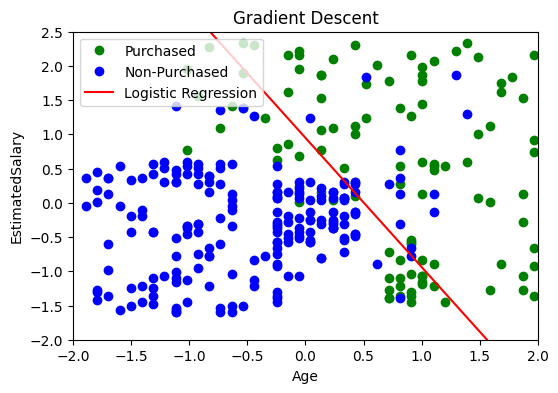

In [223]:
xp = np.linspace(-2.0, 2.0, 320).reshape(-1, 1) #데이터의 개수 320개
yp = -w[1,0]/w[2,0]*xp - w[0, 0]/w[2, 0]

plt.figure(figsize=(6, 4))
plt.plot(X_train_bias[C1, 1],X_train_bias[C1, 2] , 'go', label = "Purchased")
plt.plot(X_train_bias[C0, 1], X_train_bias[C0, 2], 'bo', label = "Non-Purchased")
plt.plot(xp, yp, 'r', label = "Logistic Regression")

plt.title("Gradient Descent")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.5])
plt.legend(loc=2)
plt.show()

Scikit-Learn을 이용한 모델학습

In [224]:
model = LogisticRegression()
model.fit(X_train_norm, y_train.ravel())


LogisticRegression()

In [225]:
w0 = model.intercept_[0]
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]
# 파라미터 값 출력
print('w0 = ', w0)
print('w1 = ', w1)
print('w2 = ', w2)

w0 =  -1.0855647530473618
w1 =  2.092536450578165
w2 =  1.1117567159433366


Scikit-Learn Model 시각화

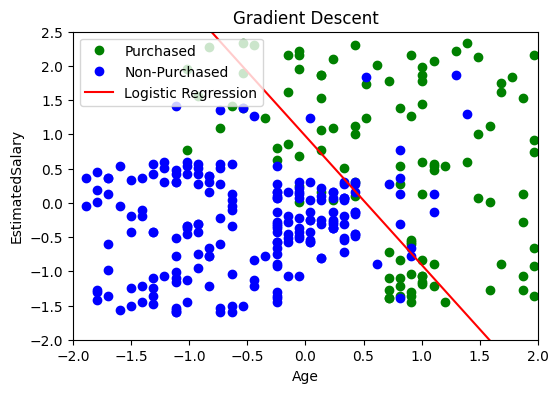

In [226]:
xp = np.linspace(-2.0, 2.0, 320).reshape(-1, 1)
yp = -w1/w2*xp - w0/w2

plt.figure(figsize=(6, 4))
plt.plot(X_train_bias[C1, 1],X_train_bias[C1,2] , 'go', label = "Purchased")
plt.plot(X_train_bias[C0, 1], X_train_bias[C0, 2], 'bo', label = "Non-Purchased")
plt.plot(xp, yp, 'r', label = "Logistic Regression")

plt.title("Gradient Descent")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.5])
plt.legend(loc=2)
plt.show()

테스트 데이터 정규화

In [227]:
#테스트 데이터 정규화 및 바이어스 추가
#(테스트 데이터 - 전체 데이터의 평균) / (전체 데이터의 표준편차)
X_test_norm = (X_test - mean) / std
X_test_bias = np.hstack((np.ones((80, 1)), X_test_norm))

테스트 데이터 시각화

In [228]:
#클래스 나누기

C0 = np.where(y_test == False)[0]
C1 = np.where(y_test == True)[0]

Y = sigmoid(X_test_bias @ w) > 0.5

Y = np.empty([320, 1])
Y[C0] = 0
Y[C1] = 1

In [229]:
model = LogisticRegression()
model.fit(X_test_norm, y_test.ravel())

w0 = model.intercept_[0]
w1 = model.coef_[0, 0]
w2 = model.coef_[0, 1]

In [230]:
#테스트 데이터에 대한 파라미터
print('w0 = ', w0, '\nw1 = ', w1, '\nw2 = ', w2)

w0 =  -0.9789190397505243 
w1 =  2.146004699029011 
w2 =  0.9468445209420995


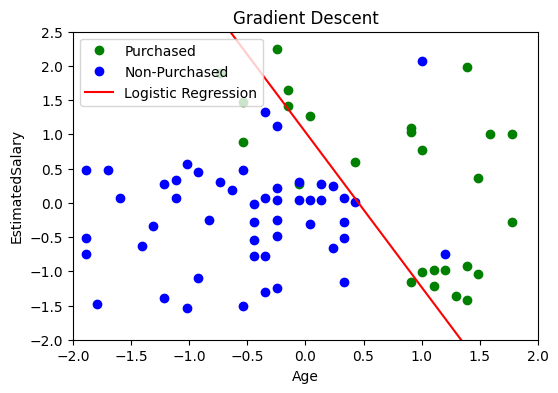

In [231]:
xp = np.linspace(-2.0, 2.0, 80).reshape(-1, 1)
yp = -w1/w2*xp - w0/w2

plt.figure(figsize=(6, 4))
plt.plot(X_test_bias[C1, 1],X_test_bias[C1,2] , 'go', label = "Purchased")
plt.plot(X_test_bias[C0, 1], X_test_bias[C0, 2], 'bo', label = "Non-Purchased")
plt.plot(xp, yp, 'r', label = "Logistic Regression")
plt.plot()
plt.title("Gradient Descent")
plt.xlabel("Age")
plt.ylabel("EstimatedSalary")
plt.xlim([-2.0, 2.0])
plt.ylim([-2.0, 2.5])
plt.legend(loc=2)
plt.show()

추가 코딩 - 로지스틱 회귀로 얻은 예측값 y_pred을 테스트 데이터로 평가해보기

In [232]:
#테스트 데이터에 대한 모델의 예측값
y_pred = model.predict(X_test_norm)
result = accuracy_score(y_test, y_pred)

print("모델의 정확도 = ", result)

모델의 정확도 =  0.9125
